## Baseline models

In [413]:
import dataloader
import DataDLC
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import importlib
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import joblib
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [414]:
importlib.reload(dataloader)
importlib.reload(DataDLC)

<module 'DataDLC' from 'c:\\Users\\jalvarez\\Documents\\Code\\GitHubCOde\\Behavioral_Tagging_of_Mice_in_multiple_Mice_dataset_using_Deep_Learning\\src\\DataDLC.py'>

**Load DMD_null male dataset**

In [415]:
# Deactivate warnings
import warnings
warnings.filterwarnings('ignore')

data_loader = dataloader.DLCDataLoader(r'c:\Users\jalvarez\Documents\Data\DataLoader_Baseline_models', batch_size=1, num_workers=1, device = 'cpu', build_graph=False)

['DMD_mal_Test_10DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_11DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_12DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_13DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_14DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_15DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_16DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_17DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_18DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_19DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_1DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_20DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_21

#### Split the trainning and test dataset

In [416]:
dataset = data_loader.dataset

In [421]:
# behaviour names
beh_names = dataset[0][1].columns
beh_names

Index(['Frames', 'General_Contacts', 'Sniffing_R', 'Poursuit_R', 'Dominance_R',
       'Rearing_R', 'Grooming_R', 'Sniffing_V', 'Poursuit_V', 'Dominance_V',
       'Rearing_V', 'Grooming_V'],
      dtype='object')

In [422]:

y = []
coords_dmd_null = []
behaviour = []

for i in tqdm.tqdm(range(len(dataset)-1)):

    ### Prepare a dataset wich is simply all the points concatenated
    n_frames, n_features_coords = dataset[i][0].values.shape
    n_bp_tot = n_features_coords // 3 # 3 coordinates per body part (body parts of both individuals)
    coords = dataset[i][0].values.reshape(n_frames*n_bp_tot, 3) # Only to treat NANs

    has_nan = np.isnan(coords).any(axis=1)
    coords[has_nan, :] = [0, 0, 0]
    coords = coords.reshape(n_frames, n_features_coords) # Back to the original shape

    if coords.shape[0] != dataset[i][1].shape[0]:
        print("Warrning: ", i, " ", coords.shape[0], " ", dataset[i][1].shape[0])
    coords_dmd_null.append(coords)
    behaviour.append(dataset[i][1].to_numpy())

  0%|          | 0/58 [00:00<?, ?it/s]

100%|██████████| 58/58 [00:00<00:00, 169.64it/s]


In [423]:
y = np.concatenate(behaviour)
X = np.concatenate(coords_dmd_null)

In [424]:
print(X.shape)
print(y.shape)

(152647, 108)
(152647, 12)


In [425]:
# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [426]:
# MinMax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [427]:
print(X_train.shape)
print(X_test.shape)


(122117, 108)
(30530, 108)


---

### General contact

In [428]:
y_gencont_train = y_train[:, 1]
y_gencont_test = y_test[:, 1]

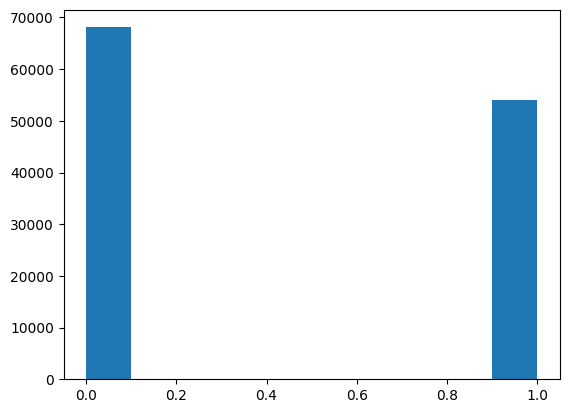

In [429]:
# class balance
plt.hist(y_gencont_train)
plt.show()

In [430]:
# Create the model
model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, verbose=True)

In [431]:
model.fit(X_train, y_gencont_train)

Iteration 1, loss = 0.51322270
Iteration 2, loss = 0.43690534
Iteration 3, loss = 0.42623924
Iteration 4, loss = 0.42058267
Iteration 5, loss = 0.41416635
Iteration 6, loss = 0.41223573
Iteration 7, loss = 0.40978659
Iteration 8, loss = 0.40791290
Iteration 9, loss = 0.40529018
Iteration 10, loss = 0.40193365
Iteration 11, loss = 0.40047638
Iteration 12, loss = 0.39845509
Iteration 13, loss = 0.39584251
Iteration 14, loss = 0.39323704
Iteration 15, loss = 0.38985588
Iteration 16, loss = 0.38785252
Iteration 17, loss = 0.38495804
Iteration 18, loss = 0.38243776
Iteration 19, loss = 0.37908376
Iteration 20, loss = 0.37745793
Iteration 21, loss = 0.37586122
Iteration 22, loss = 0.37254221
Iteration 23, loss = 0.37039074
Iteration 24, loss = 0.36725846
Iteration 25, loss = 0.36451797
Iteration 26, loss = 0.36201287
Iteration 27, loss = 0.36040033
Iteration 28, loss = 0.35933341
Iteration 29, loss = 0.35562219
Iteration 30, loss = 0.35543508
Iteration 31, loss = 0.35170123
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, verbose=True)

In [432]:
y_pred = model.predict(X_test)

accuracy_score(y_gencont_test, y_pred)

0.8676056338028169

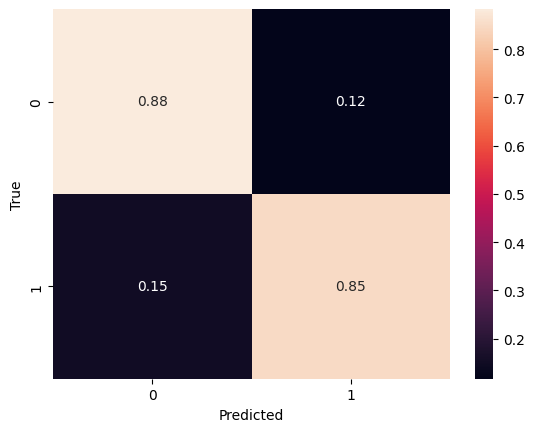

In [433]:
# Confusion matrix


conf_matrix = confusion_matrix(y_gencont_test, y_pred)
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [31]:
# save model

joblib.dump(model, 'baseline_models/model_gencont.pkl')

['baseline_models/model_gencont.pkl']

---

In [276]:
beh_names[2]

'Sniffing_R'

## Sniff resident

In [277]:
y_sniffR_train = y_train[:, 2]
y_sniffR_test = y_test[:, 2]


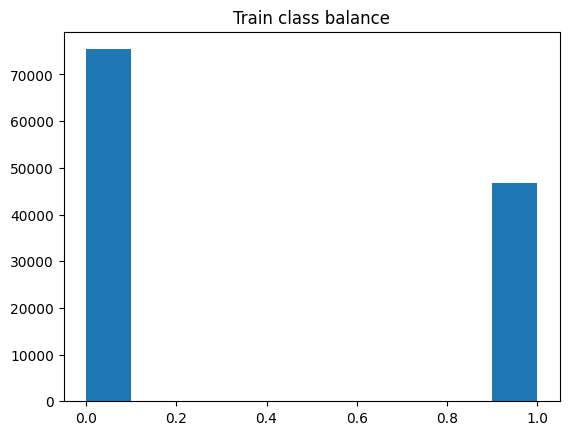

In [278]:
# Class Balance
plt.hist(y_sniffR_train)
plt.title('Train class balance')
plt.show()


In [34]:
# Create the model
model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, verbose=True)


In [35]:
# Train the model
model.fit(X_train, y_sniffR_train)

Iteration 1, loss = 0.52208556
Iteration 2, loss = 0.43164059
Iteration 3, loss = 0.40814650
Iteration 4, loss = 0.39692347
Iteration 5, loss = 0.39040019
Iteration 6, loss = 0.38652362
Iteration 7, loss = 0.38211073
Iteration 8, loss = 0.37791377
Iteration 9, loss = 0.37523198
Iteration 10, loss = 0.37241515
Iteration 11, loss = 0.37090822
Iteration 12, loss = 0.36961086
Iteration 13, loss = 0.36569891
Iteration 14, loss = 0.36421200
Iteration 15, loss = 0.36333027
Iteration 16, loss = 0.35990721
Iteration 17, loss = 0.35745257
Iteration 18, loss = 0.35527545
Iteration 19, loss = 0.35417827
Iteration 20, loss = 0.35246001
Iteration 21, loss = 0.35387865
Iteration 22, loss = 0.34835482
Iteration 23, loss = 0.34435363
Iteration 24, loss = 0.34602329
Iteration 25, loss = 0.34226648
Iteration 26, loss = 0.34223187
Iteration 27, loss = 0.34102730
Iteration 28, loss = 0.33693633
Iteration 29, loss = 0.33552923
Iteration 30, loss = 0.33516192
Iteration 31, loss = 0.33180797
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, verbose=True)

In [36]:
y_pred = model.predict(X_test)

accuracy_score(y_sniffR_test, y_pred)

0.8987016168544831

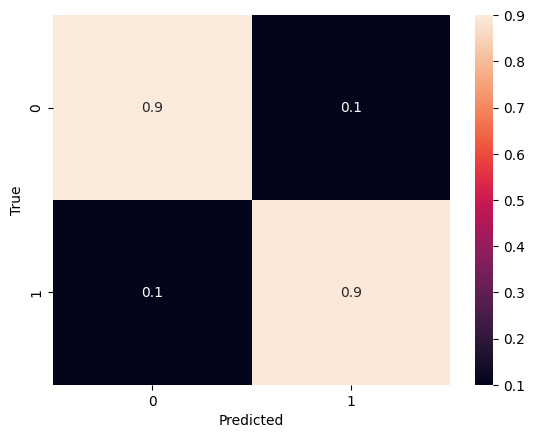

In [37]:
# Confusion matrix

conf_matrix = confusion_matrix(y_sniffR_test, y_pred)
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [48]:
# Save the model
joblib.dump(model, 'baseline_models/model_sniffR.pkl')

['baseline_models/model_sniffR.pkl']

---

In [301]:
beh_names[3]

'Poursuit_R'

### Poursuite Resident

In [302]:
y_poursuitR_train = y_train[:, 3]
y_poursuitR_test = y_test[:, 3]

In [303]:
# Check Nans in the data

print(np.isnan(y_poursuitR_train).sum())

# Discard the Nans
X_train_pourR = X_train[~np.isnan(y_poursuitR_train)]
y_poursuitR_train = y_poursuitR_train[~np.isnan(y_poursuitR_train)]

X_test_pourR = X_test[~np.isnan(y_poursuitR_test)]
y_poursuitR_test = y_poursuitR_test[~np.isnan(y_poursuitR_test)]




65177


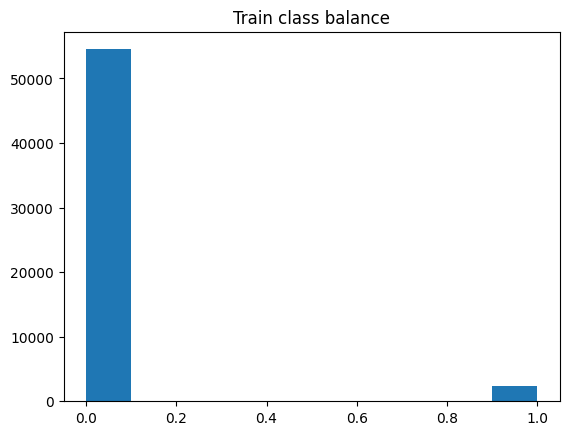

Active:  2432.0
Inactive:  54508.0
 Percentage of active:  0.04271162627327011


In [304]:
# Class Balance
plt.hist(y_poursuitR_train)
plt.title('Train class balance')
plt.show()

print('Active: ', y_poursuitR_train.sum())
print('Inactive: ', (1-y_poursuitR_train).sum())
print(' Percentage of active: ', y_poursuitR_train.sum() / len(y_poursuitR_train))

**I don't have yet sufficient data, but let's try it anyway**

In [305]:
# Downsample the inactive class
idx = np.where(y_poursuitR_train == 0)[0]
idx = np.random.choice(idx, np.sum(y_poursuitR_train == 1), replace=False)
idx = np.concatenate([np.where(y_poursuitR_train == 1)[0], idx])

X_train_pourR = X_train_pourR[idx]
y_poursuitR_train = y_poursuitR_train[idx]


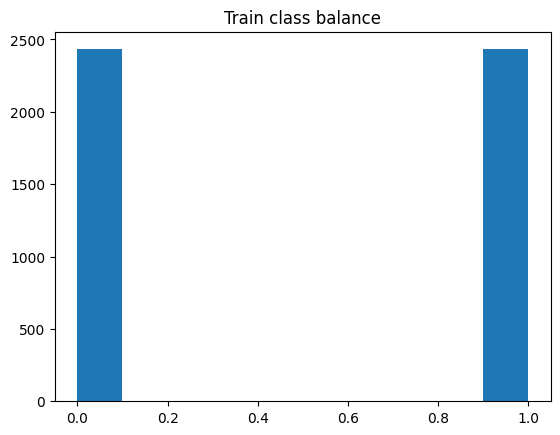

Dimension of the training set:  (4864, 108)


In [307]:
# class balance
plt.hist(y_poursuitR_train)
plt.title('Train class balance')
plt.show()

print('Dimension of the training set: ', X_train_pourR.shape)


In [133]:
# Too many features

In [310]:
# Create the model
model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, verbose=True)

In [311]:
# Train the model
model.fit(X_train_pourR, y_poursuitR_train)


Iteration 1, loss = 0.68776260
Iteration 2, loss = 0.66345887
Iteration 3, loss = 0.63410004
Iteration 4, loss = 0.61058547
Iteration 5, loss = 0.58988640
Iteration 6, loss = 0.56260984
Iteration 7, loss = 0.56525262
Iteration 8, loss = 0.53982160
Iteration 9, loss = 0.53881588
Iteration 10, loss = 0.51757434
Iteration 11, loss = 0.51927640
Iteration 12, loss = 0.49844652
Iteration 13, loss = 0.50133593
Iteration 14, loss = 0.48449372
Iteration 15, loss = 0.47366978
Iteration 16, loss = 0.46450290
Iteration 17, loss = 0.46364984
Iteration 18, loss = 0.45345719
Iteration 19, loss = 0.44651732
Iteration 20, loss = 0.44102332
Iteration 21, loss = 0.44042671
Iteration 22, loss = 0.42451790
Iteration 23, loss = 0.43873775
Iteration 24, loss = 0.42958031
Iteration 25, loss = 0.42770122
Iteration 26, loss = 0.41896517
Iteration 27, loss = 0.42499031
Iteration 28, loss = 0.42102083
Iteration 29, loss = 0.42021453
Iteration 30, loss = 0.41537572
Iteration 31, loss = 0.40564163
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, verbose=True)

In [313]:
# Test the model
y_pred = model.predict(X_test_pourR)

accuracy_score(y_poursuitR_test, y_pred)


0.799957346982299

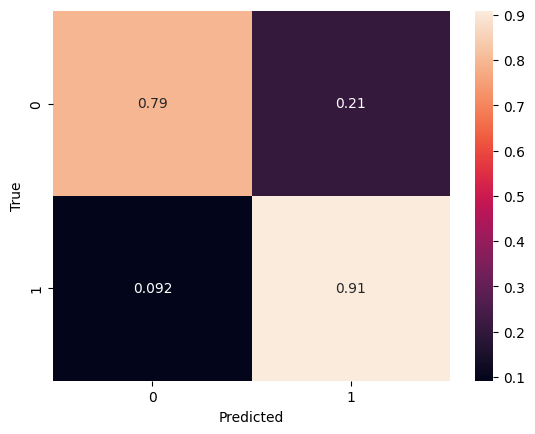

In [316]:
# Confusion matrix
conf_matrix = confusion_matrix(y_poursuitR_test, y_pred)
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


---

In [317]:
beh_names[4]

'Dominance_R'

## Dominance Resident

In [325]:
y_domR_train = y_train[:,4]
y_domR_test = y_test[:,4]

print(' Nans : ', np.isnan(y_domR_train).sum())

# Get rid of Nan's
X_train_dom_R = X_train[~np.isnan(y_domR_train)]
y_train_dom_R = y_domR_train[~np.isnan(y_domR_train)]

X_test_dom_R = X_test[~np.isnan(y_domR_test)]
y_test_dom_R = y_domR_test[~np.isnan(y_domR_test)] 



 Nans :  65177


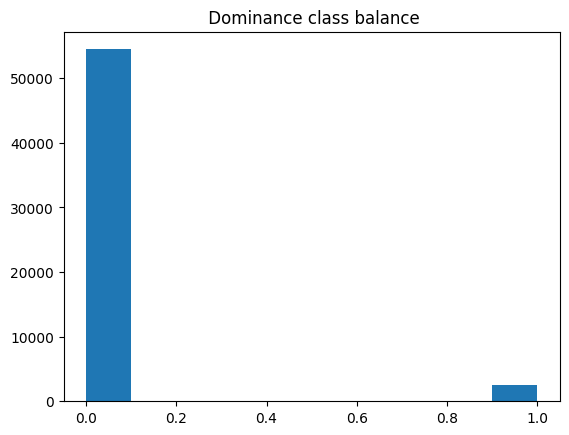

 Dominance events: 2454.0
 Inactive events  54486.0
 Percentqge: 0.04309799789251844


In [328]:
# class balance
plt.hist(y_train_dom_R)
plt.title(" Dominance class balance")
plt.show()

print(' Dominance events:', y_train_dom_R.sum())
print(' Inactive events ', (1 - y_train_dom_R).sum())
print(' Percentqge:',  y_train_dom_R.sum()/len(y_train_dom_R))


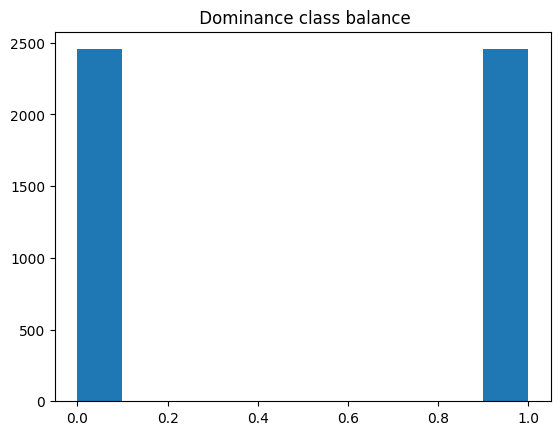

Dimension of the training set:  (4908, 108)


In [329]:
# Downsample the inactive class
idx = np.where(y_train_dom_R == 0)[0]
idx = np.random.choice(idx, np.sum(y_train_dom_R == 1), replace=False)
idx = np.concatenate([np.where(y_train_dom_R == 1)[0], idx])

X_train_dom_R = X_train_dom_R[idx]
y_train_dom_R = y_train_dom_R[idx]

# class balance
plt.hist(y_train_dom_R)
plt.title(" Dominance class balance")
plt.show()

print('Dimension of the training set: ', X_train_dom_R.shape)

In [330]:
# fit the model
model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, verbose=True)

model.fit(X_train_dom_R, y_train_dom_R)


Iteration 1, loss = 0.63579631
Iteration 2, loss = 0.56242776
Iteration 3, loss = 0.53720704
Iteration 4, loss = 0.51697225
Iteration 5, loss = 0.51427117
Iteration 6, loss = 0.50371654
Iteration 7, loss = 0.49750811
Iteration 8, loss = 0.48858173
Iteration 9, loss = 0.48621394
Iteration 10, loss = 0.47929767
Iteration 11, loss = 0.47415120
Iteration 12, loss = 0.46658618
Iteration 13, loss = 0.46884116
Iteration 14, loss = 0.47133381
Iteration 15, loss = 0.45174744
Iteration 16, loss = 0.45457282
Iteration 17, loss = 0.44126843
Iteration 18, loss = 0.43761963
Iteration 19, loss = 0.43109115
Iteration 20, loss = 0.44173939
Iteration 21, loss = 0.43145841
Iteration 22, loss = 0.42232827
Iteration 23, loss = 0.42148981
Iteration 24, loss = 0.42105850
Iteration 25, loss = 0.42996250
Iteration 26, loss = 0.41111811
Iteration 27, loss = 0.40564106
Iteration 28, loss = 0.40752722
Iteration 29, loss = 0.40064625
Iteration 30, loss = 0.40433093
Iteration 31, loss = 0.40153463
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, verbose=True)

In [331]:
# Test the model
y_pred = model.predict(X_test_dom_R)

accuracy_score(y_test_dom_R, y_pred)


0.8214260325584701

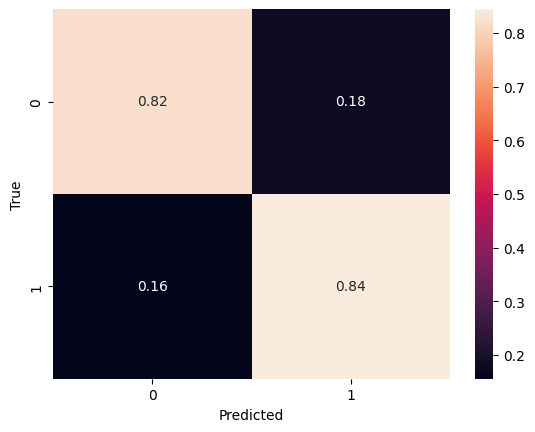

In [332]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test_dom_R, y_pred)
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


---

In [368]:
beh_names[5]

'Rearing_R'

# Rearing R

In [369]:
y_rearingR_train = y_train[:, 5]
y_rearingR_test = y_test[:, 5]

In [370]:
# Check Nans in the data
np.isnan(y_rearingR_train).sum()

0

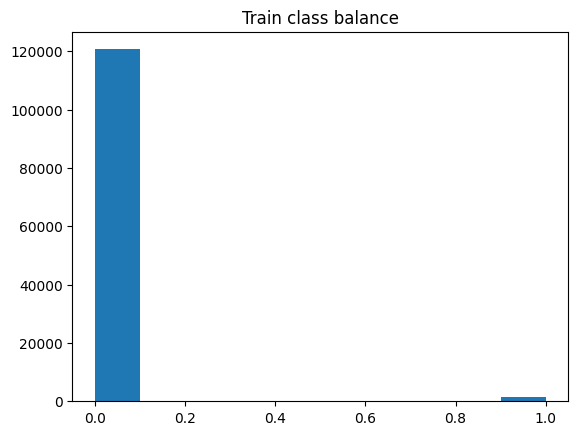

Active:  1441
Inactive:  120676
Percentage:  0.011800158864040223


In [371]:
# Class Balance
plt.hist(y_rearingR_train)
plt.title('Train class balance')
plt.show()

print('Active: ', np.sum(y_rearingR_train == 1))
print('Inactive: ', np.sum(y_rearingR_train == 0))
print('Percentage: ', np.sum(y_rearingR_train == 1) / len(y_rearingR_train))



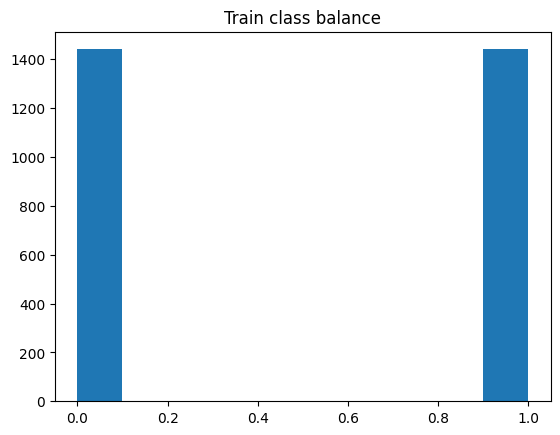

 Train dataset size:  (2882, 108)


In [372]:
# Downsample the inactive class
idx = np.where(y_rearingR_train == 0)[0]
idx = np.random.choice(idx, np.sum(y_rearingR_train == 1), replace=False)
idx = np.concatenate([np.where(y_rearingR_train == 1)[0], idx])
idx = np.random.permutation(idx)

X_rearingR_train = X_train[idx]
y_rearingR_train = y_rearingR_train[idx]

# class balance
plt.hist(y_rearingR_train)
plt.title('Train class balance')
plt.show()

print(' Train dataset size: ', X_rearingR_train.shape)


In [373]:
# Create the model

model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, verbose=True)

# Train the model
model.fit(X_rearingR_train, y_rearingR_train)

Iteration 1, loss = 0.69351483
Iteration 2, loss = 0.67703772
Iteration 3, loss = 0.66913313
Iteration 4, loss = 0.65856972
Iteration 5, loss = 0.64265438
Iteration 6, loss = 0.63247043
Iteration 7, loss = 0.62114555
Iteration 8, loss = 0.61385409
Iteration 9, loss = 0.61208852
Iteration 10, loss = 0.60381863
Iteration 11, loss = 0.60108693
Iteration 12, loss = 0.59653669
Iteration 13, loss = 0.58895234
Iteration 14, loss = 0.58845360
Iteration 15, loss = 0.58190603
Iteration 16, loss = 0.58529334
Iteration 17, loss = 0.57985059
Iteration 18, loss = 0.57787917
Iteration 19, loss = 0.57023923
Iteration 20, loss = 0.56847234
Iteration 21, loss = 0.57218334
Iteration 22, loss = 0.56374059
Iteration 23, loss = 0.56686959
Iteration 24, loss = 0.56536695
Iteration 25, loss = 0.55298239
Iteration 26, loss = 0.55936474
Iteration 27, loss = 0.55284498
Iteration 28, loss = 0.55006947
Iteration 29, loss = 0.55536190
Iteration 30, loss = 0.55189418
Iteration 31, loss = 0.55273121
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, verbose=True)

In [374]:
# Test the model
y_pred = model.predict(X_test)

accuracy_score(y_rearingR_test, y_pred)


0.751293809367835

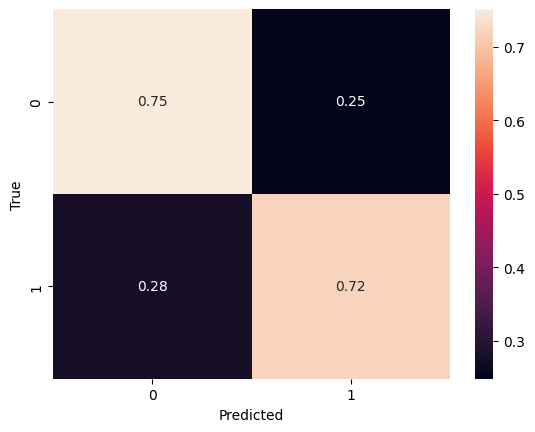

In [375]:
# Confusion matrix
conf_matrix = confusion_matrix(y_rearingR_test, y_pred)
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


---

In [376]:
beh_names[6]

'Grooming_R'

## Grooming Resident

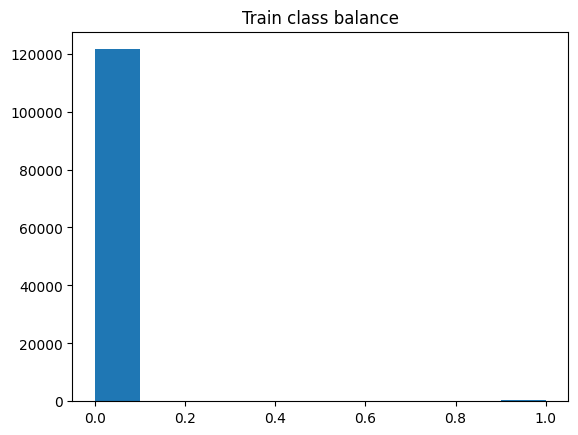

Active:  594
Inactive:  121523
Percentage:  0.004864187623344825


In [377]:
y_groomR_train = y_train[:, 6]
y_groomR_test = y_test[:, 6]

# Check Nans in the data
np.isnan(y_groomR_train).sum()

# Class Balance
plt.hist(y_groomR_train)
plt.title('Train class balance')
plt.show()

print('Active: ', np.sum(y_groomR_train == 1))
print('Inactive: ', np.sum(y_groomR_train == 0))
print('Percentage: ', np.sum(y_groomR_train == 1) / len(y_groomR_train))



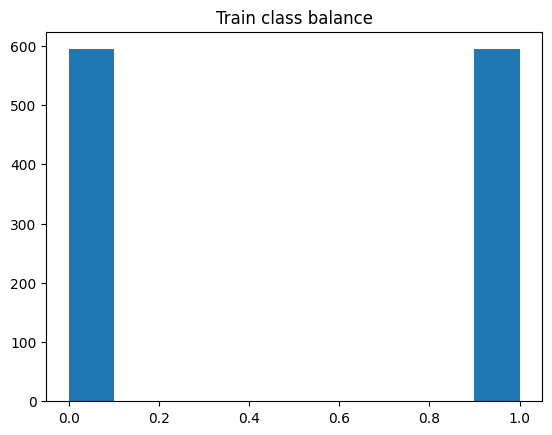

 Train dataset size:  (1188, 108)


In [378]:
# Downsample the inactive class
idx = np.where(y_groomR_train == 0)[0]
idx = np.random.choice(idx, np.sum(y_groomR_train == 1), replace=False)
idx = np.concatenate([np.where(y_groomR_train == 1)[0], idx])
idx = np.random.permutation(idx)

X_groomR_train = X_train[idx]
y_groomR_train = y_groomR_train[idx]

# class balance
plt.hist(y_groomR_train)
plt.title('Train class balance')
plt.show()

print(' Train dataset size: ', X_groomR_train.shape)


In [379]:
# Create the model
model = MLPClassifier(hidden_layer_sizes=(100), max_iter=1000, verbose=True)

# Train the model
model.fit(X_groomR_train, y_groomR_train)


Iteration 1, loss = 0.68609510
Iteration 2, loss = 0.67335486
Iteration 3, loss = 0.65854360
Iteration 4, loss = 0.64611346
Iteration 5, loss = 0.64231178
Iteration 6, loss = 0.64558554
Iteration 7, loss = 0.63763642
Iteration 8, loss = 0.63408678
Iteration 9, loss = 0.62697467
Iteration 10, loss = 0.62512450
Iteration 11, loss = 0.62032774
Iteration 12, loss = 0.61870018
Iteration 13, loss = 0.61562853
Iteration 14, loss = 0.61229961
Iteration 15, loss = 0.61268535
Iteration 16, loss = 0.60749598
Iteration 17, loss = 0.60358567
Iteration 18, loss = 0.60003576
Iteration 19, loss = 0.59655667
Iteration 20, loss = 0.59557616
Iteration 21, loss = 0.59226274
Iteration 22, loss = 0.58720306
Iteration 23, loss = 0.58382294
Iteration 24, loss = 0.58001619
Iteration 25, loss = 0.57751254
Iteration 26, loss = 0.57305233
Iteration 27, loss = 0.57138649
Iteration 28, loss = 0.56873163
Iteration 29, loss = 0.57046440
Iteration 30, loss = 0.57090975
Iteration 31, loss = 0.55999759
Iteration 32, los

MLPClassifier(hidden_layer_sizes=100, max_iter=1000, verbose=True)

In [380]:
# Test the model
y_pred = model.predict(X_test)

accuracy_score(y_groomR_test, y_pred)


0.8651490337373076

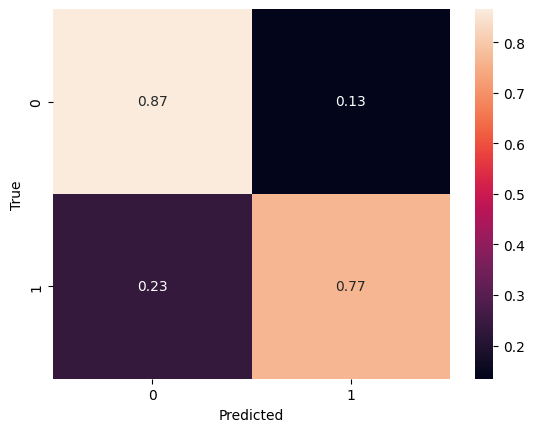

In [381]:
# Confusion matrix
conf_matrix = confusion_matrix(y_groomR_test, y_pred)
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


THis makes no sense

---

In [382]:
beh_names[7]

'Sniffing_V'

## Sinff Visiteur

In [383]:
y_sniffV_train = y_train[:, 7]
y_sniffV_test = y_test[:, 7]


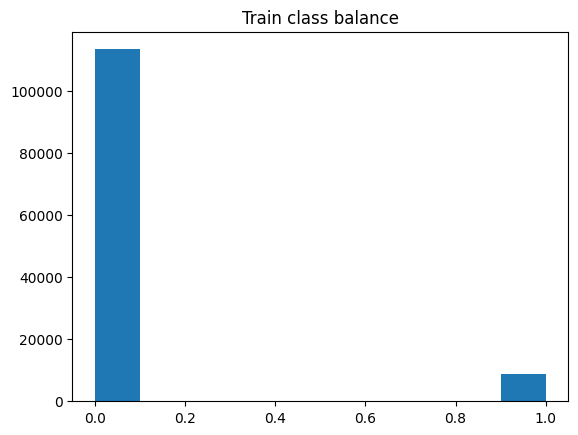

Active:  8799
Inactive:  113318
Percentage:  0.072053849996315


In [384]:
# Class Balance
plt.hist(y_sniffV_train)
plt.title('Train class balance')
plt.show()

print('Active: ', np.sum(y_sniffV_train == 1))
print('Inactive: ', np.sum(y_sniffV_train == 0))
print('Percentage: ', np.sum(y_sniffV_train == 1) / len(y_sniffV_train))



In [385]:
# Downsample the Inactive class
np.random.seed(42)
idx = np.where(y_sniffV_train == 0)[0]
idx = np.random.choice(idx, np.sum(y_sniffV_train == 1), replace=False)
idx = np.concatenate([idx, np.where(y_sniffV_train == 1)[0]])
idx = np.random.permutation(idx)
X_train_sniff_V = X_train[idx]
y_sniffV_train = y_sniffV_train[idx]

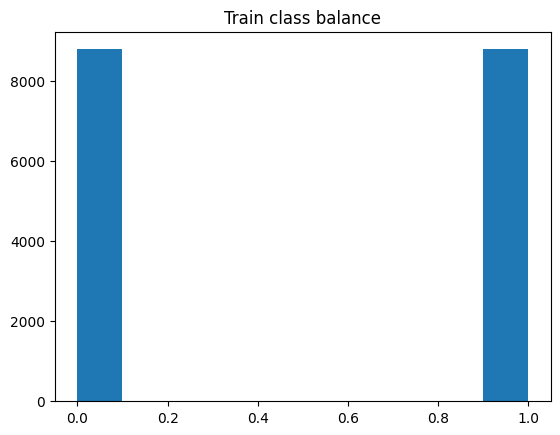

In [386]:
# class balance
plt.hist(y_sniffV_train)
plt.title('Train class balance')
plt.show()


In [387]:
# Create the model
model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, verbose=True)


In [388]:
# Train the model
model.fit(X_train_sniff_V, y_sniffV_train)


Iteration 1, loss = 0.64789867
Iteration 2, loss = 0.56687938
Iteration 3, loss = 0.50913318
Iteration 4, loss = 0.46552506
Iteration 5, loss = 0.43930679
Iteration 6, loss = 0.42713193
Iteration 7, loss = 0.41812745
Iteration 8, loss = 0.40956297
Iteration 9, loss = 0.40182529
Iteration 10, loss = 0.40054321
Iteration 11, loss = 0.39821207
Iteration 12, loss = 0.39294846
Iteration 13, loss = 0.38581481
Iteration 14, loss = 0.38194715
Iteration 15, loss = 0.38258621
Iteration 16, loss = 0.38729193
Iteration 17, loss = 0.37663777
Iteration 18, loss = 0.37608958
Iteration 19, loss = 0.38030478
Iteration 20, loss = 0.37118825
Iteration 21, loss = 0.37438138
Iteration 22, loss = 0.36990951
Iteration 23, loss = 0.36512836
Iteration 24, loss = 0.37009905
Iteration 25, loss = 0.36321413
Iteration 26, loss = 0.35770959
Iteration 27, loss = 0.36243292
Iteration 28, loss = 0.35852321
Iteration 29, loss = 0.35821103
Iteration 30, loss = 0.35610503
Iteration 31, loss = 0.35665148
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, verbose=True)

In [389]:
y_pred = model.predict(X_test)

accuracy_score(y_sniffV_test, y_pred)

0.8407140517523747

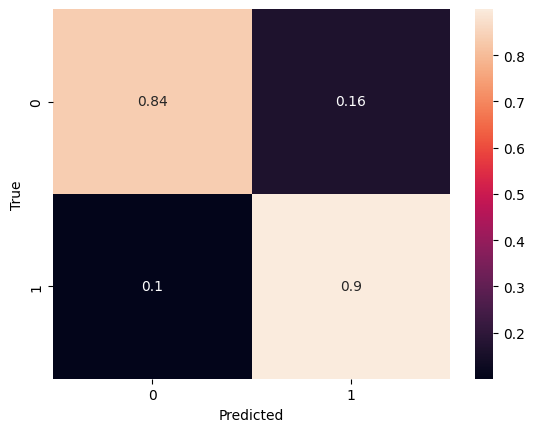

In [390]:
# Confusion matrix
conf_matrix = confusion_matrix(y_sniffV_test, y_pred)
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [391]:
# Save the model
joblib.dump(model, 'baseline_models/model_sniffV.pkl')

['baseline_models/model_sniffV.pkl']

---

In [392]:
beh_names[8]

'Poursuit_V'

## Poursuite Visiteur

In [393]:
y_poursuitV_train = y_train[:, 8]
y_poursuitV_test = y_test[:, 8]


0


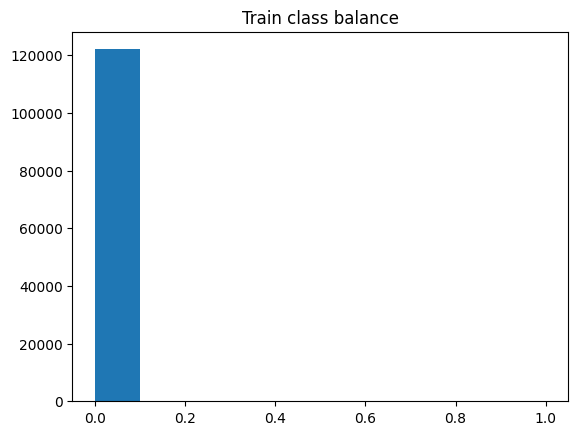

Active:  50
Inactive:  122067
Percentage:  0.0004094434026384533


In [394]:
# check Nans in the data
print(np.isnan(y_poursuitV_train).sum())

# Class Balance
plt.hist(y_poursuitV_train)
plt.title('Train class balance')
plt.show()

print('Active: ', np.sum(y_poursuitV_train == 1))
print('Inactive: ', np.sum(y_poursuitV_train == 0))
print('Percentage: ', np.sum(y_poursuitV_train == 1) / len(y_poursuitV_train))



---

In [395]:
beh_names[9]

'Dominance_V'

## Dominance Visiteur

0


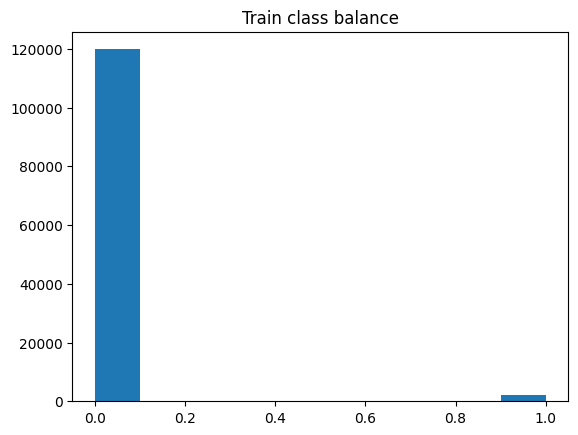

Active:  2269
Inactive:  119848
Percentage:  0.01858054161173301


In [396]:
y_domV_train = y_train[:, 9]
y_domV_test = y_test[:, 9]

# Check Nans in the data
print(np.isnan(y_domV_train).sum())

# Class Balance
plt.hist(y_domV_train)
plt.title('Train class balance')
plt.show()

print('Active: ', np.sum(y_domV_train == 1))
print('Inactive: ', np.sum(y_domV_train == 0))
print('Percentage: ', np.sum(y_domV_train == 1) / len(y_domV_train))


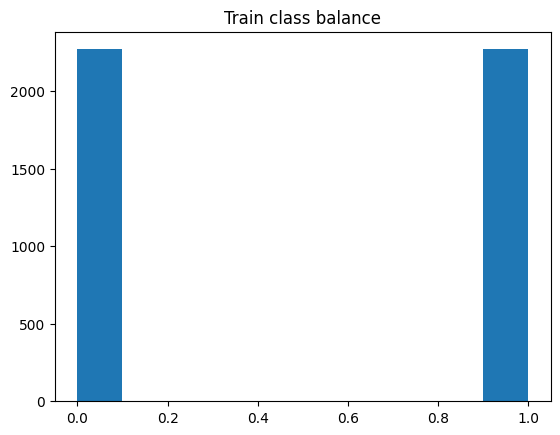

 Train dataset size:  (4538, 108)


In [397]:
# Downsample the Inactive class
np.random.seed(42)
idx = np.where(y_domV_train == 0)[0]
idx = np.random.choice(idx, np.sum(y_domV_train == 1), replace=False)
idx = np.concatenate([idx, np.where(y_domV_train == 1)[0]])
idx = np.random.permutation(idx)

X_train_dom_V = X_train[idx]
y_domV_train = y_domV_train[idx]

# class balance
plt.hist(y_domV_train)
plt.title('Train class balance')
plt.show()

print(' Train dataset size: ', X_train_dom_V.shape)


In [398]:
# Create the model
model = MLPClassifier(hidden_layer_sizes=(100), max_iter=1000, verbose=True)

# Train the model
model.fit(X_train_dom_V, y_domV_train)



Iteration 1, loss = 0.66307297
Iteration 2, loss = 0.63698538
Iteration 3, loss = 0.62550067
Iteration 4, loss = 0.61380114
Iteration 5, loss = 0.60439996
Iteration 6, loss = 0.60166150
Iteration 7, loss = 0.60012970
Iteration 8, loss = 0.58493456
Iteration 9, loss = 0.57697678
Iteration 10, loss = 0.56724133
Iteration 11, loss = 0.56289911
Iteration 12, loss = 0.55555724
Iteration 13, loss = 0.54748991
Iteration 14, loss = 0.54135891
Iteration 15, loss = 0.53411973
Iteration 16, loss = 0.52800909
Iteration 17, loss = 0.52043033
Iteration 18, loss = 0.51270632
Iteration 19, loss = 0.50505003
Iteration 20, loss = 0.50054549
Iteration 21, loss = 0.50171192
Iteration 22, loss = 0.50119345
Iteration 23, loss = 0.49779103
Iteration 24, loss = 0.48585560
Iteration 25, loss = 0.48058164
Iteration 26, loss = 0.48219672
Iteration 27, loss = 0.47836855
Iteration 28, loss = 0.46620608
Iteration 29, loss = 0.46161334
Iteration 30, loss = 0.45722888
Iteration 31, loss = 0.45534634
Iteration 32, los

MLPClassifier(hidden_layer_sizes=100, max_iter=1000, verbose=True)

In [399]:
# Test the model
y_pred = model.predict(X_test)

accuracy_score(y_domV_test, y_pred)

0.8236161152964298

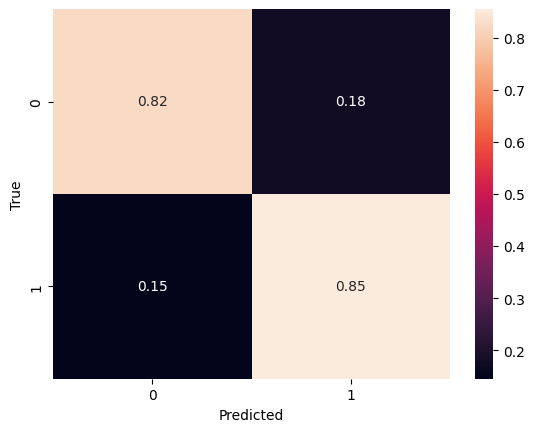

In [400]:
# Confusion matrix
conf_matrix = confusion_matrix(y_domV_test, y_pred)
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


---

In [401]:
beh_names[10]

'Rearing_V'

---

In [402]:
beh_names[11]

'Grooming_V'

## Grooming Visiteur

In [403]:
y_groomV_train = y_train[:, 11]
y_groomV_test = y_test[:, 11]

In [404]:
print(len(y_groomV_train))

122117


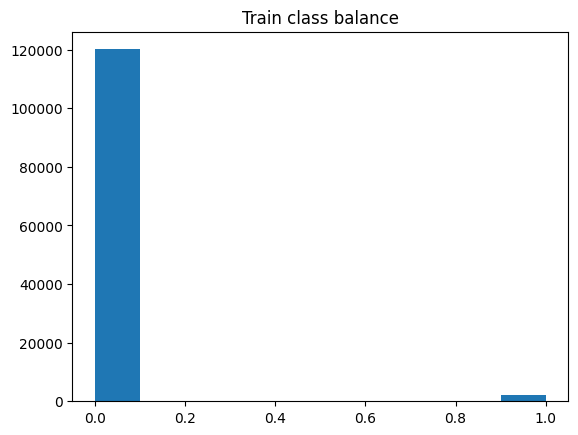

Active:  2015
Inactive:  120102
Percentage:  0.01650056912632967


In [405]:
# Class Balance
plt.hist(y_groomV_train)
plt.title('Train class balance')
plt.show()

print('Active: ', np.sum(y_groomV_train == 1))
print('Inactive: ', np.sum(y_groomV_train == 0))
print('Percentage: ', np.sum(y_groomV_train == 1) / len(y_groomV_train))


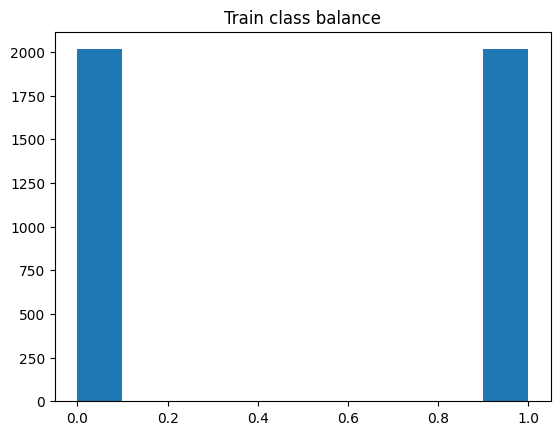

(4030, 108)


In [406]:
# Downsample the Inactive class
np.random.seed(42)
idx = np.where(y_groomV_train == 0)[0]
idx = np.random.choice(idx, np.sum(y_groomV_train == 1), replace=False)
idx = np.concatenate([idx, np.where(y_groomV_train == 1)[0]])
idx = np.random.permutation(idx)
X_train_groom_V = X_train[idx]
y_groomV_train = y_groomV_train[idx]

# class balance
plt.hist(y_groomV_train)
plt.title('Train class balance')
plt.show()

print(X_train_groom_V.shape)

In [407]:
# Create the model
model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, verbose=True, tol = 1e-5)


In [408]:
# Train the model
model.fit(X_train_groom_V, y_groomV_train)

Iteration 1, loss = 0.68441858
Iteration 2, loss = 0.64665073
Iteration 3, loss = 0.62549574
Iteration 4, loss = 0.61099275
Iteration 5, loss = 0.60713614
Iteration 6, loss = 0.57927383
Iteration 7, loss = 0.55956647
Iteration 8, loss = 0.54604383
Iteration 9, loss = 0.53052055
Iteration 10, loss = 0.51826748
Iteration 11, loss = 0.50368597
Iteration 12, loss = 0.49372690
Iteration 13, loss = 0.49487264
Iteration 14, loss = 0.48108320
Iteration 15, loss = 0.47421395
Iteration 16, loss = 0.46785222
Iteration 17, loss = 0.45702179
Iteration 18, loss = 0.45523091
Iteration 19, loss = 0.44484708
Iteration 20, loss = 0.44416169
Iteration 21, loss = 0.43350476
Iteration 22, loss = 0.43211917
Iteration 23, loss = 0.44168358
Iteration 24, loss = 0.42039327
Iteration 25, loss = 0.43899538
Iteration 26, loss = 0.41237589
Iteration 27, loss = 0.40983319
Iteration 28, loss = 0.44384044
Iteration 29, loss = 0.41502990
Iteration 30, loss = 0.40442820
Iteration 31, loss = 0.38996529
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, tol=1e-05,
              verbose=True)

In [409]:
y_pred = model.predict(X_test)
accuracy_score(y_groomV_test, y_pred)

0.8730429086144775

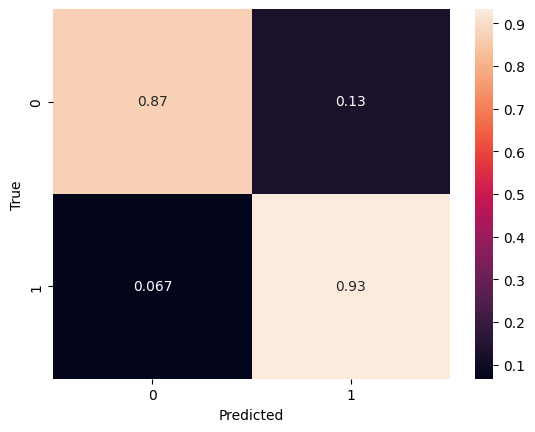

In [410]:
# Confusion matrix
conf_matrix = confusion_matrix(y_groomV_test, y_pred)
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


---

In [412]:
beh_names[12]

IndexError: index 12 is out of bounds for axis 0 with size 12

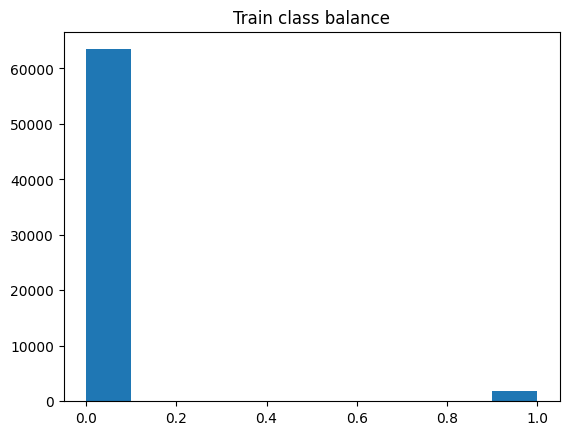

In [152]:
y_pourV_train = y_train[:, 7]
y_pourV_test = y_test[:, 10]

# Class Balance
plt.hist(y_pourV_train)
plt.title('Train class balance')
plt.show()


---

---

---

---


---

---

---

---

---

---

---

---

---

# This is only data cleannning, renaming, grouping, etc

#### Extra checks

In [42]:
import os

In [44]:
df = pd.read_csv(r'c:\Users\jalvarez\Documents\Data\DataLoader_DMD_null_male\DMD_mal_Test_1.csv')
original_column = df.columns

In [45]:
# Check that the columns are ordered in the .csv files contained in the path
files_path = r'c:\Users\jalvarez\Documents\Data\DataLoader_DMD_null_male' 

for file in os.listdir(files_path):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(files_path, file))
        if not np.array_equal(original_column, df.columns):
            print(file)
        

### Adding all the missing behaviors

In [36]:
csv_file = r'c:\Users\jalvarez\Documents\Data\Behaviour\MDX5CV\male female\Test_1.csv'

df = pd.read_csv(csv_file)
df.sum(axis=0)

Frame                               3446625.0
contacts generaux (R + V) active       1966.0
sniff total resident active            1993.0
redressement R active                    11.0
grooming R active                         0.0
poursuite R active                      200.0
dominance R active                      272.0
grooming V active                         5.0
sniff total visiteur active             352.0
redressement V active                    37.0
poursuite V active                        0.0
dominance V active                        2.0
dtype: float64

In [47]:
behaviours = ['Frames', 'General_Contacts', 'Sniffing_R', 'Poursuit_R', 'Dominance_R', 'Rearing_R', 'Grooming_R', 'Sniffing_V', 'Poursuit_V', 'Dominance_V', 'Rearing_V', 'Grooming_V']
original_column = ['Frame', 'contacts generaux (R + V) active', 'sniff total resident active', 'poursuite R active', 'dominance R active', 'redressement R active', 'grooming R active',
                    'sniff total visiteur active', 'poursuite V active', 'dominance V active', 'redressement V active', 'grooming V active']

In [48]:
dict_columns = dict(zip(original_column, behaviours))

In [49]:
dict_columns

{'Frame': 'Frames',
 'contacts generaux (R + V) active': 'General_Contacts',
 'sniff total resident active': 'Sniffing_R',
 'poursuite R active': 'Poursuit_R',
 'dominance R active': 'Dominance_R',
 'redressement R active': 'Rearing_R',
 'grooming R active': 'Grooming_R',
 'sniff total visiteur active': 'Sniffing_V',
 'poursuite V active': 'Poursuit_V',
 'dominance V active': 'Dominance_V',
 'redressement V active': 'Rearing_V',
 'grooming V active': 'Grooming_V'}

In [38]:
for i in range(len(behaviours)):
    print(behaviours[i], '--', original_column[i])

Frames -- Frame
General_Contacts -- contacts generaux (R + V) active
Sniffing_R -- sniff total resident active
Poursuit_R -- poursuite R active
Dominance_R -- dominance R active
Rearing_R -- redressement R active
Grooming_R -- grooming R active
Sniffing_V -- sniff total visiteur active
Poursuit_V -- poursuite V active
Dominance_V -- dominance V active
Rearing_V -- redressement V active
Grooming_V -- grooming V active


In [39]:
# Reorder and rename the columns
df = pd.read_csv(csv_file)
df.sum(axis=0)


Frame                               3446625.0
contacts generaux (R + V) active       1966.0
sniff total resident active            1993.0
redressement R active                    11.0
grooming R active                         0.0
poursuite R active                      200.0
dominance R active                      272.0
grooming V active                         5.0
sniff total visiteur active             352.0
redressement V active                    37.0
poursuite V active                        0.0
dominance V active                        2.0
dtype: float64

In [40]:
df = df[original_column]
df.sum(axis=0)


Frame                               3446625.0
contacts generaux (R + V) active       1966.0
sniff total resident active            1993.0
poursuite R active                      200.0
dominance R active                      272.0
redressement R active                    11.0
grooming R active                         0.0
sniff total visiteur active             352.0
poursuite V active                        0.0
dominance V active                        2.0
redressement V active                    37.0
grooming V active                         5.0
dtype: float64

In [41]:
df.columns = behaviours

In [42]:
df.sum(axis=0)

Frames              3446625.0
General_Contacts       1966.0
Sniffing_R             1993.0
Poursuit_R              200.0
Dominance_R             272.0
Rearing_R                11.0
Grooming_R                0.0
Sniffing_V              352.0
Poursuit_V                0.0
Dominance_V               2.0
Rearing_V                37.0
Grooming_V                5.0
dtype: float64

In [30]:
import os

In [44]:
# Edit the csv files in the path
path = r'c:\Users\jalvarez\Documents\Data\Behaviour\MDX5CV\male female - Copie'
for file in os.listdir(path):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(path, file))
        df = df[original_column]
        df.columns = behaviours
        df.to_csv(os.path.join(path, file), index=False)
        
        

**Now DMD null**

In [69]:
file = r'c:\Users\jalvarez\Documents\Data\Behaviour\DMD\male female\Test_1.csv'
df = pd.read_csv(file)
df.sum(axis=0)

Frame                               3459765.0
contacts generaux (R + V) active       1370.0
dominance R active                      138.0
Poursuit R active                       291.0
sniff total R active                   1314.0
Grooming R active                        26.0
Redressement R active                     3.0
sniff total V active                    108.0
Grooming V active                        11.0
Redressement Q active                    43.0
dtype: float64

In [74]:
behaviours = ['Frames', 'General_Contacts', 'Sniffing_R', 'Poursuit_R', 'Dominance_R', 'Rearing_R', 'Grooming_R', 'Sniffing_V', 'Poursuit_V', 'Dominance_V', 'Rearing_V', 'Grooming_V']
original_column = ['Frame', 'contacts generaux (R + V) active', 'sniff total R active', 'Poursuit R active', 'dominance R active', 'Redressement R active', 'Grooming R active',
                    'sniff total V active', 'Poursuit V active', 'Dominance V active', 'Redressement Q active', 'Grooming V active']

dict_columns = dict(zip(original_column, behaviours))

In [75]:
dict_columns.keys()

dict_keys(['Frame', 'contacts generaux (R + V) active', 'sniff total R active', 'Poursuit R active', 'dominance R active', 'Redressement R active', 'Grooming R active', 'sniff total V active', 'Poursuit V active', 'Dominance V active', 'Redressement Q active', 'Grooming V active'])

In [76]:
actual_columns = list(df.columns)
actual_columns

['Frame',
 'contacts generaux (R + V) active',
 'dominance R active',
 'Poursuit R active',
 'sniff total R active',
 'Grooming R active',
 'Redressement R active',
 'sniff total V active',
 'Grooming V active',
 'Redressement Q active']

In [77]:
for beh in dict_columns.keys():
    if beh not in actual_columns:
        print(beh)

Poursuit V active
Dominance V active


In [78]:
folder = r'c:\Users\jalvarez\Documents\Data\Behaviour\DMD\male female - Copie'

for file in os.listdir(folder):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(folder, file))
        for beh in dict_columns.keys():
            if beh not in df.columns:
                # Add the column in that position, filled with NaNs
                df[dict_columns[beh]] = np.nan
            else:
                df = df.rename(columns={beh: dict_columns[beh]})
        df = df[behaviours]
        df.to_csv(os.path.join(folder, file), index=False)
        

In [81]:
file = r'c:\Users\jalvarez\Documents\Data\Behaviour\DMD\male female - Copie\Test_1.csv'
df = pd.read_csv(file)
df.sum(axis=0)
df.isna().sum(axis=0)

Frames                 0
General_Contacts       0
Sniffing_R             0
Poursuit_R             0
Dominance_R            0
Rearing_R              0
Grooming_R             0
Sniffing_V             0
Poursuit_V          2631
Dominance_V         2631
Rearing_V              0
Grooming_V             0
dtype: int64

### Rename

In [83]:
# add a name before each file

folder = r'c:\Users\jalvarez\Documents\Data\Behaviour\MDX5CV\male female - Copie'

for file in os.listdir(folder):
    if file.endswith(".csv"):
        new_name = 'MDXCV_fem_' + file
        os.rename(os.path.join(folder, file), os.path.join(folder, new_name))

In [255]:
importlib.reload(DataDLC)

<module 'DataDLC' from 'c:\\Users\\jalvarez\\Documents\\Code\\GitHubCOde\\Behavioral_Tagging_of_Mice_in_multiple_Mice_dataset_using_Deep_Learning\\src\\DataDLC.py'>

In [259]:
data_dlc = DataDLC.DataDLC(r'c:\Users\jalvarez\Documents\Data\DataLoader_Baseline_models\DMD_mal_Test_5DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5')

In [260]:
video_path = r'c:\Users\jalvarez\Documents\Data\DLC_analyzedvid\DMD_null\DMD_null_male\DMD_mal_Test 5DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered_id_labeled.mp4'
output_path = r'c:\Users\jalvarez\Documents\Data\OL\Nouveau dossier'
behaviour_path = r'c:\Users\jalvarez\Documents\Data\DataLoader_Baseline_models\DMD_mal_Test_5.csv'





In [261]:

events = pd.read_csv(behaviour_path)


data_dlc.create_video_per_event(video_path, output_path, events, split_behaviour=True)



  0%|          | 0/2630 [00:00<?, ?it/s]

100%|██████████| 2630/2630 [00:03<00:00, 857.54it/s] 


The event Poursuit_R is not present in the video
The event Dominance_R is not present in the video


100%|██████████| 2630/2630 [00:01<00:00, 1370.44it/s]


The event Poursuit_V is not present in the video


100%|██████████| 2630/2630 [00:01<00:00, 1542.99it/s]

The event Grooming_V is not present in the video
